# Strings

## bytes, Strings, encoding, decoding, utf-8, utf-32

In [ ]:
b = bytes([0x41, 0x42, 0x43, 0x44])
print(b)
s = "normal string"
    # Try combining them print(s+b). This will cause an error
    # decode the bytes to utf-8 first
print(b.decode('utf-8')+" "+s)

b'ABCD'
ABCD normal string


In [ ]:
#or encode the string to byte, bytes can concate 
bb = b + s.encode('UTF-8')
bb

b'ABCDnormal string'

In [ ]:
# encode the string as UTF-32
b3 = s.encode('utf-32')
print(b3)

b'\xff\xfe\x00\x00n\x00\x00\x00o\x00\x00\x00r\x00\x00\x00m\x00\x00\x00a\x00\x00\x00l\x00\x00\x00 \x00\x00\x00s\x00\x00\x00t\x00\x00\x00r\x00\x00\x00i\x00\x00\x00n\x00\x00\x00g\x00\x00\x00'


## format, template, substitute

In [ ]:
greet="hi"
print("1" + f"{greet:>20}") #  20 white spaces to the left
print("2 "+ f"{greet:<20}" + "hello")#  20 white spaces to the right
print("3 " + f"{greet:_^10}") # 10 spaces in total
print("4 " + f"{greet:_<10}")
print("5 " + f"{greet:_>10}")
print(f"{6.02:10}") # number has > in default
print(f"{7.03234:.2f}") #2 decimals
print(f"{88703970983.03234:,.2f}") # use comma for number format grouping
print(f"{88703970983.03234:_.2f}") # grouping with other symbols
print(f"{0.91233:%}")
print(f"{0.91233:.2%}")

1                  hi
2 hi                  hello
3 ____hi____
4 hi________
5 ________hi
      6.02
7.03
88,703,970,983.03
88_703_970_983.03
91.233000%
91.23%


In [ ]:
title="Python Notes"; author="Joe Black"
print(f"title is {title}, author is {author}")

title is Python Notes, author is Joe Black


In [ ]:
str1 = "You're watching {0} by {1}".format("Advanced Python", "Joe Marini")
str1

"You're watching Advanced Python by Joe Marini"

In [ ]:
from string import Template
# create a template with placeholders
templ = Template("You're watching ${title} by ${author}")

# use the substitute method with keyword arguments
str2 = templ.substitute(title="Advanced Python", author="Joe Marini")
print(str2)

You're watching Advanced Python by Joe Marini


In [ ]:
# use the substitute method with a dictionary
data = { 
    "author": "Jo Louise Smith",
    "title": "Advanced Python"
}
str3 = templ.substitute(data)    
print(str3)

You're watching Advanced Python by Jo Louise Smith


## str vs repr

In [ ]:
s = 'Hello, World...'
print (str(s))
print (repr(s))

# repr prints “official” object representation

Hello, World...
'Hello, World...'


In [ ]:
#another example

import datetime
today = datetime.datetime.now()
  
# Prints readable format for date-time object
print (str(today))
  
# prints the official format of date-time object
print (repr(today))  

2022-02-10 11:13:42.989900
datetime.datetime(2022, 2, 10, 11, 13, 42, 989900)


# Boolean

In [ ]:
size = "lg"
color = "blue"
price = 10

conditions = [
    size == "lg",
    color == "blue",
    price < 100,
]


if all(conditions):
    print("Yes, I want to buy the product.")

Yes, I want to buy the product.


In [ ]:
price = 200
conditions = [
    size == "lg",
    color == "blue",
    price < 100,
]
if any(conditions):
    print("Yes, I want to buy the product.")

Yes, I want to buy the product.


# List

## iterator, enumerate, zip

In [ ]:
days = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
daysFr = ["Dim", "Lun", "Mar", "Mer", "Jeu", "Ven", "Sam"]

# use iter to create an iterator over a collection
i = iter(days)
print(type(i))
print(next(i))  # Sun
print(next(i))  # Mon
print(next(i))  # Tue



<class 'list_iterator'>
Sun
Mon
Tue


In [ ]:
# iterate using a function and a sentinel
# with open("testfile.txt", "r") as fp:
#     for line in iter(fp.readline, ''):
#         print(line)

print("use regular interation over the days")
for m in range(len(days)):
    print(m+1, days[m])

print("using enumerate reduces code and provides a counter")
for i, m in enumerate(days, start=1):
    print(i, m)

use regular interation over the days
1 Sun
2 Mon
3 Tue
4 Wed
5 Thu
6 Fri
7 Sat
using enumerate reduces code and provides a counter
1 Sun
2 Mon
3 Tue
4 Wed
5 Thu
6 Fri
7 Sat


Zip 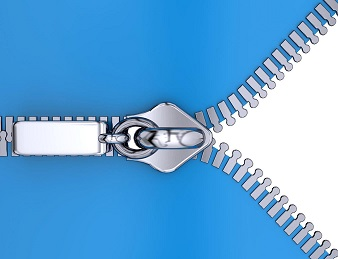

In [ ]:
print("use zip to combine sequences") 
for m in zip(days, daysFr):
    print(m)

print("zipped list type is: ", type(m))

print(list(zip(days, daysFr)))

print("enumerate the tuples")
for i, m in enumerate(zip(days, daysFr), start=1):
    print(i, m[0], "=", m[1], "in French")

use zip to combine sequences
('Sun', 'Dim')
('Mon', 'Lun')
('Tue', 'Mar')
('Wed', 'Mer')
('Thu', 'Jeu')
('Fri', 'Ven')
('Sat', 'Sam')
zipped list type is:  <class 'tuple'>
[('Sun', 'Dim'), ('Mon', 'Lun'), ('Tue', 'Mar'), ('Wed', 'Mer'), ('Thu', 'Jeu'), ('Fri', 'Ven'), ('Sat', 'Sam')]
enumerate the tuples
1 Sun = Dim in French
2 Mon = Lun in French
3 Tue = Mar in French
4 Wed = Mer in French
5 Thu = Jeu in French
6 Fri = Ven in French
7 Sat = Sam in French


In [ ]:
list1 = [1, 2, 3]
list2 = [4, 5, 6, 7]

sum_list = [a + b for a, b in zip(list1, list2)]
sum_list

[5, 7, 9]

## itertools

In [ ]:
# cycle
import itertools
seq1 = ["Joe", "John", "Mike"]
cycle1 = itertools.cycle(seq1)
print(next(cycle1))
print(next(cycle1))
print(next(cycle1))
print(next(cycle1))

Joe
John
Mike
Joe


In [ ]:
# use count to create a simple counter
count1 = itertools.count(100, 10)
print(next(count1))
print(next(count1))
print(next(count1))

100
110
120


In [ ]:
# accumulate(iterator, function)
vals = [10,20,30,40,50,40,30]
acc = itertools.accumulate(vals, max) # use max function to go through the list
abc = itertools.accumulate(vals, min) # use min function to go through the lis
print(list(acc))
print(list(abc))

[10, 20, 30, 40, 50, 50, 50]
[10, 10, 10, 10, 10, 10, 10]


In [ ]:
def minus(a,b):
  return a-b

addd = itertools.accumulate(vals, minus)
list(addd)

[10, -10, -40, -80, -130, -170, -200]

In [ ]:
# use chain to connect sequences together
x = itertools.chain("ABCD", "1234", "EDF")
print(list(x))

['A', 'B', 'C', 'D', '1', '2', '3', '4', 'E', 'D', 'F']


In [ ]:
# filter a list by another boolean list using compress
list_a = [1, 2, 4, 6]
filterlist = [True, False, True, False]
list(itertools.compress(list_a, filterlist))


[1, 4]

In [ ]:
def lessThan40(x):
    return x < 40

# dropwhile and takewhile will return values until a certain condition is met that stops them
print(list(itertools.dropwhile(lessThan40, vals)))
print(list(itertools.takewhile(lessThan40, vals)))

[40, 50, 40, 30]
[10, 20, 30]


In [ ]:

perm = itertools.permutations("ABCD", 4)
list(perm)

[('A', 'B', 'C', 'D'),
 ('A', 'B', 'D', 'C'),
 ('A', 'C', 'B', 'D'),
 ('A', 'C', 'D', 'B'),
 ('A', 'D', 'B', 'C'),
 ('A', 'D', 'C', 'B'),
 ('B', 'A', 'C', 'D'),
 ('B', 'A', 'D', 'C'),
 ('B', 'C', 'A', 'D'),
 ('B', 'C', 'D', 'A'),
 ('B', 'D', 'A', 'C'),
 ('B', 'D', 'C', 'A'),
 ('C', 'A', 'B', 'D'),
 ('C', 'A', 'D', 'B'),
 ('C', 'B', 'A', 'D'),
 ('C', 'B', 'D', 'A'),
 ('C', 'D', 'A', 'B'),
 ('C', 'D', 'B', 'A'),
 ('D', 'A', 'B', 'C'),
 ('D', 'A', 'C', 'B'),
 ('D', 'B', 'A', 'C'),
 ('D', 'B', 'C', 'A'),
 ('D', 'C', 'A', 'B'),
 ('D', 'C', 'B', 'A')]

In [ ]:
l = ["ABC", "CDE", "DEF"]
perm = itertools.combinations(l,2)
list(perm)

[('ABC', 'CDE'), ('ABC', 'DEF'), ('CDE', 'DEF')]

## filter, map, sorted

filter and map use function to transform list values. Map does one to one (or one to two, one to three mappings), filter use true/false to filter list

### filter

In [ ]:
# filter(function, iterable) https://docs.python.org/3/library/functions.html

def filterOdd(x):
    if x % 2 == 0:
        return False
    return True

nums = (1, 8, 4, 5, 13, 26, 381, 410, 58)

list(filter(filterOdd, nums))

[1, 5, 13, 381]

In [ ]:
def filterUpper(x):
  if x.isupper():
    return True
  else:
    return False

chars = "abcDeFGHiJklmnoP"

list(filter(filterUpper, chars))

['D', 'F', 'G', 'H', 'J', 'P']

filter first parameter has to be a function, a simple filter([true, false], list) won't work. Use itertool compress from abvoe instead

### simple map

In [ ]:
def square(x):
  return x*x

list(map(square, nums)) # list comprehension alterative [square(x) for x in nums]

[1, 64, 16, 25, 169, 676, 145161, 168100, 3364]

In [ ]:
# use built-in function to map
chars = "abcd"
list(map(ord, chars))

[97, 98, 99, 100]

In [ ]:
list(map(len, chars))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

map one to two

In [ ]:
powerIndex=[2,1,3]
list(map(pow, nums, powerIndex)) #The final iterable is only as long as the shortest iterable

[1, 8, 64]

### lambda and function map

In [ ]:
list(map(lambda x, y: x - y, [2, 4, 6], [1, 3, 5,7]))

[1, 1, 1]

In [ ]:
list(map(lambda x, y, z: x + y + z, [2, 4], [1, 3], [7, 8]))

[10, 15]

In [ ]:
def powers(x):
  return x**2, x**3, x**4

list(map(powers, range(1,6,2)))

[(1, 1, 1), (9, 27, 81), (25, 125, 625)]

string list manipulation: strip, split, sub with built-in str functions

In [ ]:
with_spaces = ["processing ", "  strings", "with   ", " map   "]
list(map(str.strip, with_spaces))

['processing', 'strings', 'with', 'map']

In [ ]:
# use lambda to strip other symbols
with_dots = ["processing..", "...strings", "with....", "..map.."]
list(map(lambda s: s.strip("."), with_dots))

['processing', 'strings', 'with', 'map']

In [ ]:
#split text to word list, then remove punctuation (a list of symbols) use re.sub
text = """Some people, when confronted with a problem, think
"I know, I'll use regular expressions."
Now they have two problems. Jamie Zawinski"""

words = text.split()
words

['Some',
 'people,',
 'when',
 'confronted',
 'with',
 'a',
 'problem,',
 'think',
 '"I',
 'know,',
 "I'll",
 'use',
 'regular',
 'expressions."',
 'Now',
 'they',
 'have',
 'two',
 'problems.',
 'Jamie',
 'Zawinski']

In [ ]:
# remove punctuation use re.sub
import re
def remove_punctuation(word):
      return re.sub(r'[!?.:;,"()-]', "", word)

list(map(remove_punctuation, words))

['Some',
 'people',
 'when',
 'confronted',
 'with',
 'a',
 'problem',
 'think',
 'I',
 'know',
 "I'll",
 'use',
 'regular',
 'expressions',
 'Now',
 'they',
 'have',
 'two',
 'problems',
 'Jamie',
 'Zawinski']

### Caesar Cipher an example

*   Original alphabet: abcdefghijklmnopqrstuvwxyz
*   Alphabet rotated by three: defghijklmnopqrstuvwxyzabc

In [ ]:
def rotate_chr(c):
    rot_by = 3
    c = c.lower()
    alphabet = "abcdefghijklmnopqrstuvwxyz"
    # Keep punctuation and whitespace
    if c not in alphabet:
        return c
    rotated_pos = ord(c) + rot_by
    # If the rotation is inside the alphabet
    if rotated_pos <= ord(alphabet[-1]):
        return chr(rotated_pos)
    # If the rotation goes beyond the alphabet
    return chr(rotated_pos - len(alphabet))

In [ ]:
"".join(map(rotate_chr, "My secret message goes here."))

'pb vhfuhw phvvdjh jrhv khuh.'

### Word count example

In [ ]:
def count_words(sentences):
    freq = {}
    for word in sentences.split():
        freq[word] = freq.get(word, 0) + 1 # default to 0 is unfounded, otherwise +1
    return freq

a = ["aaa aaa bbb cc ddd ee ee f gg", "aaa aaa aaa ccc ee ggg h", "aaa ccc ee ggg hh i"]
count = map(count_words, a)
aa = list(count)
aa

[{'aaa': 2, 'bbb': 1, 'cc': 1, 'ddd': 1, 'ee': 2, 'f': 1, 'gg': 1},
 {'aaa': 3, 'ccc': 1, 'ee': 1, 'ggg': 1, 'h': 1},
 {'aaa': 1, 'ccc': 1, 'ee': 1, 'ggg': 1, 'hh': 1, 'i': 1}]

In [ ]:
def add_counts(d1, d2):
  d = d1.copy()
  for word, count in d2.items():
    d[word] = d.get(word, 0) + count
  return d

In [ ]:
from functools import reduce
ttl_counts = reduce(add_counts, aa)
ttl_counts

{'aaa': 6,
 'bbb': 1,
 'cc': 1,
 'ccc': 2,
 'ddd': 1,
 'ee': 4,
 'f': 1,
 'gg': 1,
 'ggg': 2,
 'h': 1,
 'hh': 1,
 'i': 1}

## function parameter

In [ ]:
def addition(base, *args):
    result = 0
    for arg in args:
        result += arg

    return result

print(addition(5, 10, 15, 20))

45


In [ ]:
myNums = [5, 10, 15, 20]
print(addition(myNums))
print(addition(*myNums))

0
45


use `*list` to unduunpack positional parameter and `**dict` to unpack kwargs 

## Collections

counter

In [ ]:
import collections

class1 = ["Bob", "James", "Chad", "Darcy", "Penny", "Hannah", "Kevin", "James", "Melanie", "Becky", "Steve", "Frank"]

# list of students in class 2
class2 = ["Bill", "Barry", "Cindy", "Debbie", "Frank", "Gabby", "Kelly", "James", "Joe", "Sam", "Tara", "Ziggy"]

# Create a Counter for class1 and class2
c1 = collections.Counter(class1)
c2 = collections.Counter(class2)

# How many students in class 1 named James?
print(c1["James"])

# How many students are in class 1?
print(sum(c1.values()), "students in class 1")

# Combine the two classes
c1.update(class2)
print(sum(c1.values()), "students in class 1 and 2")

# What's the most common name in the two classes?
print(c1.most_common(3))

# Separate the classes again
c1.subtract(class2)
print(c1.most_common(1))

# What's common between the two classes?
print(c1 & c2)

2
12 students in class 1
24 students in class 1 and 2
[('James', 3), ('Frank', 2), ('Bob', 1)]
[('James', 2)]
Counter({'James': 1, 'Frank': 1})


deque objects are like double-ended queues

In [ ]:
# initialize a deque with lowercase letters
import string
d = collections.deque(string.ascii_lowercase)

# deques support the len() function
print("d has " + str(len(d)) + " lower case letters")

# deques can be iterated over
for elem in d:
    print(elem.upper(), end=",")
print("")
# manipulate items from either end
d.pop()
d.popleft()
d.append(2)
d.appendleft(1)
print(d)

# rotate the deque
print(d)
d.rotate(1)
print(d) #Caesar Cipher example can be simplified here

d has 26 lower case letters
A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,
deque([1, 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 2])
deque([1, 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 2])
deque([2, 1, 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'])


namedtuple

In [ ]:
Point = collections.namedtuple("Point", "x y")

p1 = Point(10, 20)
p2 = Point(30, 40)

print(p1, p2)
print(p1.x, p1.y)

# use _replace to create a new instance
p1 = p1._replace(x=100)
print(p1)

Point(x=10, y=20) Point(x=30, y=40)
10 20
Point(x=100, y=20)


ordered dict

In [ ]:
a = collections.OrderedDict({"a": 1, "b": 2, "c": 3})
b = collections.OrderedDict({"a": 1, "c": 3, "b": 2})
print("Equality test: ", a == b)

Equality test:  False


## Logging

In [ ]:
import logging
import sys

logging.basicConfig(level=logging.DEBUG,
                    # filemode="w",
                    # filename="output.log")
                    stream=sys.stdout, 
                    format='%(asctime)s %(levelname)-8s %(message)s', 
                    datefmt='%Y-%m-%d %H:%M:%S'
                    )

# Try out each of the log levels
logging.debug("This is a debug-level log message")
logging.info("This is an info-level log message")
logging.warning("This is a warning-level message")
logging.error("This is an error-level message")
logging.critical("This is a critical-level message")

# Output formatted string to the log
logging.info("Here's a {} variable and an int: {}".format("string", 10))

2021-12-18 22:19:18 DEBUG    This is a debug-level log message
2021-12-18 22:19:18 INFO     This is an info-level log message
2021-12-18 22:19:18 WARNING  This is a warning-level message
2021-12-18 22:19:18 ERROR    This is an error-level message
2021-12-18 22:19:18 CRITICAL This is a critical-level message
2021-12-18 22:19:18 INFO     Here's a string variable and an int: 10


In [ ]:
import logging
import sys
# add function name and line number 
fmtStr = "%(asctime)s: %(levelname)s: %(funcName)s Line:%(lineno)d %(message)s"

logging.basicConfig(# filename="output.log",
                    level=logging.DEBUG,
                    format=fmtStr,
                    stream=sys.stdout)

def anotherFunction():
    logging.debug("This is a debug-level log message")




logging.info("This is an info-level log message")
logging.warning("This is a warning-level message")
anotherFunction()
# colab at python 3.7 doesn't print those variables

2021-12-18 22:33:57,632: INFO: <module> Line:17 This is an info-level log message
2021-12-18 22:33:57,634: WARNING: <module> Line:18 This is a warning-level message
2021-12-18 22:33:57,635: DEBUG: anotherFunction Line:12 This is a debug-level log message


add custom extra data/variables

In [ ]:
import logging
import sys

extData = {'user': 'joem@example.com'}


def anotherFunction():
    logging.debug("This is a debug-level log message", extra=extData)




fmtStr = "%(asctime)s: %(levelname)s: %(funcName)s Line:%(lineno)d User:%(user)s %(message)s"
dateStr = "%m/%d/%Y %I:%M:%S %p"
logging.basicConfig( # filename="output.log",
                level=logging.DEBUG,
                format=fmtStr,
                datefmt=dateStr,
                stream=sys.stdout)

logging.info("This is an info-level log message", extra=extData)
logging.warning("This is a warning-level message", extra=extData)
anotherFunction()

12/18/2021 10:36:06 PM: INFO: <module> Line:21 User:joem@example.com This is an info-level log message
12/18/2021 10:36:06 PM: WARNING: <module> Line:22 User:joem@example.com This is a warning-level message
12/18/2021 10:36:06 PM: DEBUG: anotherFunction Line:8 User:joem@example.com This is a debug-level log message


## Comprehensions

dictionary

In [ ]:
ctemps = [0, 12, 34, 100]
tempDict = {t: (t * 9/5) + 32 for t in ctemps if t < 100}
tempDict

{0: 32.0, 12: 53.6, 34: 93.2}

In [ ]:
team1 = {"Jones": 24, "Jameson": 18, "Smith": 58, "Burns": 7}
team2 = {"White": 12, "Macke": 88, "Perce": 4}

newTeam = {k: v for team in (team1, team2) for k, v in team.items()}
newTeam
# equivalent to :
# newTeams={}
# for team in (team1, team2):
#     newTeams.update(team)


{'Jones': 24,
 'Jameson': 18,
 'Smith': 58,
 'Burns': 7,
 'White': 12,
 'Macke': 88,
 'Perce': 4}

In [ ]:
team1 | team2 #python 3.9 or later

{'Jones': 24,
 'Jameson': 18,
 'Smith': 58,
 'Burns': 7,
 'White': 12,
 'Macke': 88,
 'Perce': 4}

List

In [ ]:
a=list(range(10))
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
[b ** 2 for b in a if b % 2 == 0]

[0, 4, 16, 36, 64]

In [ ]:
[(x,y) for x in range(10) if x%3 ==0 for y in range(10) if y < x]

[(3, 0),
 (3, 1),
 (3, 2),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (9, 0),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8)]

# Dictionary

In [ ]:
dict1 = {1:"zz", 2:"gg", 3:"ya", 4:"aa"}
# order by key
dict(sorted(dict1.items()))

{1: 'zz', 2: 'gg', 3: 'ya', 4: 'aa'}

In [ ]:
# order by value
# order by key
dict(sorted(dict1.items(), key = lambda item1: item1[1]))

{1: 'zz', 2: 'gg', 3: 'ya', 4: 'aa'}

# Lambda

lambda also work with map, filter functions, examples above

In [1]:
# lambda is like def, x is the parameter
(lambda x: x + 1)(2)

3

In [20]:
#multiple parameters, condition must have else
(lambda x, y, z: x + y + z if(1<x<5, y<9) else -1)(3, 8, 1) 

12

In [21]:
# multiple conditions on a parameter need more ()
(lambda x: x * 10 if x > 10 else (x * 5 if x < 5 else x))(11)

110

In [22]:
# Not recommended by PEP8
increment = lambda x: x + 1
increment(2)

3

# Function

In [ ]:
# function annotation, the text behind : for annotation purpose only
def function3ParamAnnotation(a: 'random word',  c: float, b: int = 4):
  return a * b, c*b

function3ParamAnnotation(a="cv", b=3, c="fc")

('cvcvcv', 'fcfcfc')

## Parent Children functions

In [ ]:
# child function are local variable to parent and only exists in parent
def parent(num):
  def child_one():
    return "Emma"
  def child_two():
    return "Bob"
  
  if num == 1:
    return child_one
  else:
    return child_two

In [ ]:
daughter = parent(1)
daughter

<function __main__.parent.<locals>.child_one>

In [ ]:
daughter()

'Emma'

## Decorator

### treat parent as a decorator for child

In [ ]:
# most primitive way
import time

def decor(f):
  starttime = time.time()
  f()
  endtime = time.time()
  print("child function run time is ", (endtime-starttime)*1000, "ms")

def funct():
  print("hello")
  time.sleep(2)
  print("world")

decor(funct) # identical to parent child function example above

hello
world
child function run time is  2009.1969966888428 ms


### primitive decor (without wrapper return function)

In [ ]:
# [@functionName way
import time

def decor(f):
  starttime = time.time()
  f()
  endtime = time.time()
  print("child function run time is ", (endtime-starttime)*1000, "ms")

@decor
def funct():
  print("hello")
  time.sleep(2)
  print("world")



hello
world
child function run time is  2007.1759223937988 ms


In [ ]:
@decor
def funct():
  print("hello")
  time.sleep(3)
  print("world2")

hello
world2
child function run time is  3004.634141921997 ms


Though decor function is reusable, funct() is not, you get 
TypeError: 'NoneType' object is not callable

### wrapper function in parent, true decorator example

In [ ]:
# proper @functionName way where parent function returns child/wrapper function
def decor(f):
  def wrapper(): # wrapper can be any name, simplifity, all examples use wrapper function here
    starttime = time.time()
    f()
    endtime = time.time()
    print("child function run time is ", (endtime-starttime)*1000, "ms")
  return wrapper

In [ ]:
@decor
def funct():
  print("hello")
  time.sleep(3)
  print("world2")

In [ ]:
funct()

hello
world2
child function run time is  3004.889965057373 ms


### parameter passing (*args, **kwargs)

In [ ]:
# pass on the parameter using wrapper(*args, **kwargs)
import time

def decor(f):
  print("print a line from parent")
  def wrapper(*args, **kwargs):
    starttime = time.time()
    f(*args, **kwargs)
    endtime = time.time()
    print("child function run time is ", (endtime-starttime)*1000, "ms")
  return wrapper

@decor
def funct(n):
  print("hello")
  time.sleep(n)
  print("world2")

print a line from parent


In [ ]:
funct(5) # funct function runs all the code in parent's wrapper function

hello
world2
child function run time is  5005.742073059082 ms


### return something from wrapper

In [ ]:
# return whatever in wrapper function
def decor(f):
  print("print a line from parent")
  def wrapper(*args, **kwargs):
    starttime = time.time()
    f(*args, **kwargs)
    endtime = time.time()
    print("child function run time is ", (endtime-starttime)*1000, "ms")
    return str(endtime) # now whatever child function calls this, it will have a return value of endtime
  return wrapper

@decor
def funct(n):
  print("hello")
  time.sleep(n)
  print("world2")


print a line from parent


In [ ]:
funct(4)

hello
world2
child function run time is  4004.359722137451 ms


'1642366191.615169'

In [ ]:
a = funct(4)

hello
world2
child function run time is  4005.748748779297 ms


In [ ]:
a

'1642366220.6968143'

examples on [real python](https://realpython.com/primer-on-python-decorators/), includes: 1. timing, similar to previous examples, 2. debug/logging 3. plugin resgister

## Fancy (advanced) decorator

### built-in class decorator

In [ ]:
# without decorator
class Circle:
  pi = 3.1415
  def __init__(self, radius): # self can be anything. it's just a parameter , In python the first parameter of methods is the instance the method is called on
    self.radius = radius

  def radius(self):
    return self.radius

  def pie():   # won't work in a new instance unless use pie(self)
    return 3.1415926535
  
  def perimeter(self):
    return 2 * 3.14 * self.radius

  def area(self):
    return self.radius**2 * self.pi # note self.pi, self is an instance of the class


  def cylinder_volume(self, height):
    return self.area() * height # note not self.area

c=Circle(8)
c.perimeter()

50.24

In [ ]:
c.pi

3.1415

In [ ]:
c.radius

8

In [ ]:
c.area()

201.056

In [ ]:
c.cylinder_volume(10)

2010.5600000000002

In [ ]:
Circle.pie()

3.1415926535

In [ ]:
Circle(8).area()

201.056

In [ ]:
# use built-in decorator @property 
class Circle:
  pi = 3.1415
  def __init__(self, radius):
    self.R = radius
  
  @property
  def radius(self): # getter
    return self.R # can't be radius like the no decorator example above
  
  @radius.setter
  def radius(self, value): # let's modify setter methods
    if value <= 0:
      self.R = abs(value)
  @radius.deleter
  def radius(self):
    del self.R
  
  @property
  def area(self):
    return self.radius**2 * self.pi

In [ ]:
c = Circle(8)
c.radius

8

In [ ]:
c.radius = -10
c.area # it's property, so won't be a method any more like c.area()
# del c.radius

314.15000000000003

In [ ]:
# use built-in decorator @classmethod
class Circle:
  pi = 3.14
  def __init__(self, radius):
    self.R = radius
  
  def pie():   # won't work in a new instance unless use pie(self)
    return 3.1415926535
  
  @classmethod
  def area(cls): # here cls is not self, an instance, but the Circle Class
    # return cls.pi * radius ## Error: it can no longer access radius or self.R or cls.R, the instance's property or methods 
    return cls.pi*cls.pie() #pie still works as it's a class method (no self as parameter, so not an instance method)

c=Circle(2) # 2 can't be accessed by classmethod
c.area()

9.864600931990001

In [ ]:
class Circle:
  def __init__(self, radius): 
    self.R = radius

  def radius(self):
    return self.R
  
  @classmethod
  def unitCircle_area(cls):
    return cls(2)

c = Circle(11)

In [ ]:
c.unitCircle_area()

In [ ]:
c.R

11

In [ ]:
class Circle:
    def __init__(self, radius):
        self._radius = radius
    
    @classmethod
    def unit_circle(cls):
        return cls(1) # equivalent to Circle(1) without instance

c = Circle.unit_circle() # must be called with className Circle!
c._radius

1

For staticMethod, it's more like an independent method from its class. It runs anywhere by calling ClassName.staticMethod(parameter1, parameter2 ...). A bit like pie() from above example. <br>
Difference between normal class method, classmethod and staticmethod is explained in [realpython site](https://realpython.com/instance-class-and-static-methods-demystified/).

### Class decorators 

In [ ]:
# decorate class method
import time
def decor_timer(f):
  def wrapper(*args): # don't miss args
    starttime = time.time()
    childFuncitonResult = f(*args)
    endtime = time.time()
    print("child function run time is ", (endtime-starttime)*1000, "ms")
    return childFuncitonResult # this get child method returns
  return wrapper



class Circle:
  pi = 3.1415
  def __init__(self, radius):
    self.radius = radius

  def area(self):
    return self.radius**2 * self.pi 

  @decor_timer
  def cylinder_volume(self, height):
    time.sleep(2)
    return self.area() * height 

In [ ]:
c = Circle(9)
bbb = c.cylinder_volume(10)
bbb

child function run time is  2002.1400451660156 ms


2544.615

### decorate Class

In [ ]:
@decor_timer # decorating class only measure class instantiate time, not its methods
class Circle:
  pi = 3.1415
  def __init__(self, radius):
    self.radius = radius

  def area(self):
    return self.radius**2 * self.pi 

In [ ]:
c = Circle(7)

child function run time is  0.0050067901611328125 ms


In [ ]:
c.area()

153.9335

In [ ]:
from dataclasses import dataclass

@dataclass
class PlayingCard_DataClass:
    rank: str
    suit: str

# this is equivalent to below, @dataclass has other method child function can just use

class RegularCard:
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit

ModuleNotFoundError: No module named 'dataclass'

### nested decorator

In [ ]:
# start from the last decorator --> parent decorator --> then the function
def deco1(f):
  print("1111")
  def wrapper_in_deco1():
    print("2222")
    f()
    print("3333")
  return wrapper_in_deco1

def deco2(f):
  print("aaaa")
  def wrapper_in_deco2():
    print("bbbb")
    f()
    print("cccc")
  return wrapper_in_deco2

@deco1
@deco2
def test():
  print("test test")

test()

aaaa
1111
2222
bbbb
test test
cccc
3333


### decorator parameters

@decorator(parameter1=integer, parameter2=string)

In [ ]:
# A repeater example
def twice(f):
  print("print a line from parent")
  def wrapper(*args, **kwargs):
    f(*args, **kwargs)
    f(*args, **kwargs)  
  return wrapper

@twice
def greet(name):
    print(f"Hello {name}")

print a line from parent


In [ ]:
greet("Jack")

Hello Jack
Hello Jack


learn from above, wrap the twice function with repeat function - actual repeat example in [realPython](https://realpython.com/primer-on-python-decorators/), search 'repeat('

In [ ]:
def repeat(n):  #repeat n times
    def twice(func): #here twice is not actual twice, just for following the above exam
        def wrapper(*args, **kwargs):
            for i in range(n):
                func(*args, **kwargs)
        return wrapper
    return twice # must return twice, o/w 'NoneType' object is not callable Error!
  
@repeat(5) #  decorator(parameter)
def greet(name):
  print(f"Hello {name}")

In [ ]:
greet("david")

Hello david
Hello david
Hello david
Hello david
Hello david


In [ ]:
def repeat(_function=None, *, n=2):
    def twice(func):
        def wrapper(*args, **kwargs):
            for _ in range(n):
                func(*args, **kwargs)
        return wrapper

    if _function is None:
        return twice
    else:
        return twice(_function)


In [ ]:
@repeat()
def greet(name):
  print(f"Hello {name}")
greet("stephen")

Hello stephen
Hello stephen


### stateful decorator

In [ ]:
# count how many times a function was called. For a class instance to be callable, use the special .__call__() method
class Counter:
    def __init__(self, start=0):
        self.count = start

    def __call__(self): # The .__call__() method is executed each time you try to call an instance of the class
        self.count += 1
        print(f"Current count is {self.count}")

In [ ]:
counter1 = Counter()
counter1()

Current count is 1


In [ ]:
counter1()

Current count is 2


In [ ]:
class CountCalls:
    def __init__(self, func):
        self.func = func
        self.num_calls = 0

    def __call__(self, *args, **kwargs):
        self.num_calls += 1
        print(f"Call {self.num_calls} of {self.func.__name__!r}")
        return self.func(*args, **kwargs)

@CountCalls
def say_hello():
    print("hello!")


say_hello()

Call 1 of 'say_hello'
hello!


In [ ]:
say_hello()

Call 2 of 'say_hello'
hello!


### Singleton

All instances are the same instanc

In [ ]:
def singleton(cls): # cls to hint it's a class decorator
    """Make a class a Singleton class (only one instance)"""
    def wrapper(*args, **kwargs):
        if not wrapper.instance:
            wrapper.instance = cls(*args, **kwargs)
        return wrapper.instance
    wrapper.instance = None
    return wrapper

@singleton
class TheOne:
    pass

In [ ]:
first_one = TheOne()
another_one = TheOne()
print(id(first_one))
print(id(another_one)) #both instances of theOne class point to the same address

139957829742544
139957829742544


## functools

In [ ]:
import functools

#### Cache

n! factorial using memory cache

In [ ]:
@functools.lru_cache(maxsize=10) # cache only available after python 3.9
def factorial(n):
    return n * factorial(n-1) if n else 1

factorial(6)

Another example to cache URL page download

In [ ]:
import requests

@functools.lru_cache(maxsize=32)
def get_article_from_internet(url): # will check cache before downloading again
    print("Fetching article from internet...")
    response = requests.get(url)
    return response.text


#### Partial

Partial functions allow us to fix a certain number of arguments of a function and generate a new function

In [ ]:
# partial
def decimal_number(a, b, c, d):
  return a*1000 + b*100 + c*10 + d

ge_wei = functools.partial(decimal_number, 9,1,3)
ge_wei(3)

9133

In [ ]:
ge_wei = functools.partial(decimal_number, b=2, c=3)
ge_wei(a = 4, d =6)

4236

#### Cached_property

@cached_property only used on Class methods and comparable to @property, the built-in decorator introduced earlier

In [ ]:
class enlarged_Circle:
  pi = 3.1415
  def __init__(self, radius):
    self.R = radius
  
  @property
  def radius(self): 
    self.R +=  5
    return self.R

newCirlce = enlarged_Circle(6)
print(newCirlce.radius)
print(newCirlce.radius)
print(newCirlce.radius)

11
16
21


In [ ]:
class enlarged_Circle:
  pi = 3.1415
  def __init__(self, radius):
    self.R = radius
  
  @functools.cached_property #complicated result cached, so when called again, it won't be calculated again
  def radius(self): 
    self.R +=  5
    return self.R

newCirlce = enlarged_Circle(6)
print(newCirlce.radius)
print(newCirlce.radius)
print(newCirlce.radius)

11
11
11


#### Wraps

functools.wraps preserves function name, docstring, arguments list, etc

In [ ]:
def logged(func):
    def with_logging(*args, **kwargs):
        print(func.__name__ + " was called")
        return func(*args, **kwargs)
    return with_logging

@logged
def f(x):
   """does some math"""
   return x + x * x

print(f.__name__)
print(f.__doc__)

with_logging
None


function

In [ ]:
import functools
def logged(func):
    @functools.wraps(func) # don't miss (func)
    def with_logging(*args, **kwargs):
        print(func.__name__ + " was called")
        return func(*args, **kwargs)
    return with_logging

@logged
def f(x):
   """does some math"""
   return x + x * x

print(f.__name__)
print(f.__doc__)

f
does some math


# Class

### built-in method in a class

Aka special methods, are commonly used for operator overloading. <br>
eg.  `__init__, __add__, __len__, __repr__,  __call__, __new__, __eq__, __add__`

In [ ]:
# init method should return None
class B(object):
    
    def __init__(self):
        print("Initializing instance")
        # return "GeeksforGeeks"  # TypeError: __init__() should return None, not 'str'
  
print(B())

Initializing instance


In Java, a = new Class() creates new instance of a class, [python, explained in geek4geeks](https://www.geeksforgeeks.org/__new__-in-python/?ref=lbp) implicitly call `__new__()` method before `__init__()`. <br>In general, you shouldn't need to override `__new__` unless you're subclassing an immutable type like str, int, Unicode, or tuple.

In [ ]:
# overloadig __new__ method must
class Person:

    def __new__(cls):
        return super().__new__(cls) # or simply object.__new__(cls)

    def __init__(self):
        self.instance_method()

    def instance_method(self):
        print('success!')

personObj = Person()

success!


`__call__` get called as a default method 

In [ ]:
class Product:
    def __init__(self):
        print("Instance initialzed")
  
    # Defining __call__ method
    def __call__(self, a, b):
        print(a * b)

    def instance_method(self):
        print('success!')
  
# Instance created
ans = Product()
  
# __call__ method will be called
ans(10, 20)

Instance initialzed
200


In [ ]:
ans.instance_method()

success!


`__repr__` add some representation of a class

In [ ]:
class B(object):
    def __init__(self):
        pass
  
b = B()
b

In [ ]:
class B(object):
    def __repr__(self):
      return "__Repr__ of the class B instance"
b = B()
b

__Repr__ of the class B instance

difference `__str__ and __repr__` is  the same as `str vs repr` described in the beginning

### dataclass

#### vs regular class

In [ ]:
import dataclasses

@dataclasses.dataclass
class DataClassCard:
    rank: str # type hint is mandatory, if not type, use 'typing.Any', see example below
    suit: str

In [ ]:
# A data class comes with basic functionality
queen_of_Spade = DataClassCard('Q', 'Spade')
queen_of_Spade.rank

'Q'

In [ ]:
queen_of_Spade

DataClassCard(rank='Q', suit='Spade')

It's equivalent regular class would be

In [ ]:
class RegularCard:
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit

    def __repr__(self):
        return (f'{self.__class__.__name__}'
                f'(rank={self.rank!r}, suit={self.suit!r})')

    def __eq__(self, other):
        if other.__class__ is not self.__class__:
            return NotImplemented
        return (self.rank, self.suit) == (other.rank, other.suit)

One more thing to mention: one class reference another

In [ ]:
# complete example, Deck to reference two cards
import dataclasses
from typing import List

@dataclasses.dataclass
class DataClassCard:
    rank: str
    suit: str

@dataclasses.dataclass
class Deck:
    drawnCards: List[DataClassCard] # reference above class to this one


queen_of_hearts = DataClassCard('Q', 'Hearts')
ace_of_spades = DataClassCard('A', 'Spades')
cards_on_table = Deck([queen_of_hearts, ace_of_spades])
cards_on_table

Deck(drawnCards=[DataClassCard(rank='Q', suit='Hearts'), DataClassCard(rank='A', suit='Spades')])

#### vs make_dataclass

In [ ]:
DataClassCard_1Line = dataclasses.make_dataclass('DataClassCard_1Line', ['suit', 'rank'])
king_of_heart = DataClassCard_1Line('Heart', 'K')
king_of_heart.suit

'Heart'

For complete make_dataclass method, reference in [docs.python.org](https://docs.python.org/3/library/dataclasses.html), another more complicated example below:

In [ ]:
Card24Game = dataclasses.make_dataclass('Card24Game',[('rank', int), 
                                                      'holder', # any type
                                                      ('suit', str, dataclasses.field(default="Diamond"))],
# dataclasses.field allows: default, default_factory, init, compare, repr, metadata
# detaisl can be found in the docs.python.org link in above cell
                                        namespace={'holderPoint':lambda self: self.holder * self.rank})
Player1 = Card24Game(3, 'Joe', 'Spade')
Player1.holderPoint()

'JoeJoeJoe'

In [ ]:
Player2 = Card24Game(3, 99, 'Spade')
Player2.holderPoint()

297

Above example's equivalence (make_dataclass => dataclass)

In [ ]:
@dataclasses.dataclass
class Card24Game_manualDataClass:
  rank: int
  holder: 'typing.Any' # type hint is mandatory
  suit: str = 'Diamond'

  def holderPoint(self):
    return self.holder * self.rank

Player3 = Card24Game_manualDataClass(5, 'Lily')
Player3.suit

'Diamond'

A trap!! Specify a class default value with mutable variable, field(default_factory) is needed

In [ ]:
# A full deck of cards
RANKS = '2 3 4 5 6 7 8 9 10 J Q K A'.split()
SUITS = '♣ ♢ ♡ ♠'.split()

def make_french_deck():
    return [DataClassCard(r, s) for s in SUITS for r in RANKS]

make_french_deck()

[DataClassCard(rank='2', suit='♣'),
 DataClassCard(rank='3', suit='♣'),
 DataClassCard(rank='4', suit='♣'),
 DataClassCard(rank='5', suit='♣'),
 DataClassCard(rank='6', suit='♣'),
 DataClassCard(rank='7', suit='♣'),
 DataClassCard(rank='8', suit='♣'),
 DataClassCard(rank='9', suit='♣'),
 DataClassCard(rank='10', suit='♣'),
 DataClassCard(rank='J', suit='♣'),
 DataClassCard(rank='Q', suit='♣'),
 DataClassCard(rank='K', suit='♣'),
 DataClassCard(rank='A', suit='♣'),
 DataClassCard(rank='2', suit='♢'),
 DataClassCard(rank='3', suit='♢'),
 DataClassCard(rank='4', suit='♢'),
 DataClassCard(rank='5', suit='♢'),
 DataClassCard(rank='6', suit='♢'),
 DataClassCard(rank='7', suit='♢'),
 DataClassCard(rank='8', suit='♢'),
 DataClassCard(rank='9', suit='♢'),
 DataClassCard(rank='10', suit='♢'),
 DataClassCard(rank='J', suit='♢'),
 DataClassCard(rank='Q', suit='♢'),
 DataClassCard(rank='K', suit='♢'),
 DataClassCard(rank='A', suit='♢'),
 DataClassCard(rank='2', suit='♡'),
 DataClassCard(rank='3', s

In [ ]:
# Add the french deck to Class Deck's card property as default value
import typing
import dataclasses
@dataclasses.dataclass
class Deck:
  # cards: typing.List[DataClassCard]=make_french_deck() # mutable default <class 'list'> for field cards is not allowed 
  # use default_factory, which takes Function that returns the initial value of the field
  cards: typing.List[DataClassCard]= dataclasses.field(default_factory=make_french_deck)

#### Check class properties and methods

dataclasses.fields can only check classes created by @dataclasses, regular class has no attribute '____dataclass_fields___', exception will thrown

In [ ]:
print("Deck Class has")
print(dataclasses.fields(Deck)) # fields, plural s
print("DataClassCard Class has")
print(dataclasses.fields(DataClassCard))
# print(dataclasses.fields(RegularCard))

Deck Class has
(Field(name='cards',type=typing.List[__main__.DataClassCard],default=<dataclasses._MISSING_TYPE object at 0x7f8743966450>,default_factory=<function make_french_deck at 0x7f87438dc830>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD),)
DataClassCard Class has
(Field(name='rank',type=<class 'str'>,default=<dataclasses._MISSING_TYPE object at 0x7f8743966450>,default_factory=<dataclasses._MISSING_TYPE object at 0x7f8743966450>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD), Field(name='suit',type=<class 'str'>,default=<dataclasses._MISSING_TYPE object at 0x7f8743966450>,default_factory=<dataclasses._MISSING_TYPE object at 0x7f8743966450>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD))


In [ ]:
dataclasses.fields(Card24Game)

(Field(name='rank',type=<class 'int'>,default=<dataclasses._MISSING_TYPE object at 0x7f8743966450>,default_factory=<dataclasses._MISSING_TYPE object at 0x7f8743966450>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD),
 Field(name='holder',type='typing.Any',default=<dataclasses._MISSING_TYPE object at 0x7f8743966450>,default_factory=<dataclasses._MISSING_TYPE object at 0x7f8743966450>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD),
 Field(name='suit',type=<class 'str'>,default='Diamond',default_factory=<dataclasses._MISSING_TYPE object at 0x7f8743966450>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD))

#### use vars() check any class

In [ ]:
vars(RegularCard)

mappingproxy({'__dict__': <attribute '__dict__' of 'RegularCard' objects>,
              '__doc__': None,
              '__eq__': <function __main__.RegularCard.__eq__>,
              '__hash__': None,
              '__init__': <function __main__.RegularCard.__init__>,
              '__module__': '__main__',
              '__repr__': <function __main__.RegularCard.__repr__>,
              '__weakref__': <attribute '__weakref__' of 'RegularCard' objects>})

In [ ]:
vars(Card24Game_manualDataClass)

mappingproxy({'__annotations__': {'holder': 'typing.Any',
               'rank': int,
               'suit': str},
              '__dataclass_fields__': {'holder': Field(name='holder',type='typing.Any',default=<dataclasses._MISSING_TYPE object at 0x7f8743966450>,default_factory=<dataclasses._MISSING_TYPE object at 0x7f8743966450>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD),
               'rank': Field(name='rank',type=<class 'int'>,default=<dataclasses._MISSING_TYPE object at 0x7f8743966450>,default_factory=<dataclasses._MISSING_TYPE object at 0x7f8743966450>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD),
               'suit': Field(name='suit',type=<class 'str'>,default='Diamond',default_factory=<dataclasses._MISSING_TYPE object at 0x7f8743966450>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD)},
              '__dataclass_params__': _DataclassParams(init=

In [ ]:
vars(Card24Game_manualDataClass)['suit']

'Diamond'

In [ ]:
vars(Player3)

{'holder': 'Lily', 'rank': 5, 'suit': 'Diamond'}

In [ ]:
vars(DataClassCard_1Line)

mappingproxy({'__annotations__': {'rank': 'typing.Any', 'suit': 'typing.Any'},
              '__dataclass_fields__': {'rank': Field(name='rank',type='typing.Any',default=<dataclasses._MISSING_TYPE object at 0x7f8743966450>,default_factory=<dataclasses._MISSING_TYPE object at 0x7f8743966450>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD),
               'suit': Field(name='suit',type='typing.Any',default=<dataclasses._MISSING_TYPE object at 0x7f8743966450>,default_factory=<dataclasses._MISSING_TYPE object at 0x7f8743966450>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD)},
              '__dataclass_params__': _DataclassParams(init=True,repr=True,eq=True,order=False,unsafe_hash=False,frozen=False),
              '__dict__': <attribute '__dict__' of 'DataClassCard_1Line' objects>,
              '__doc__': "DataClassCard_1Line(suit: 'typing.Any', rank: 'typing.Any')",
              '__eq__': <function types

#### Class repr update

In [ ]:
# current class representation
Deck()

Deck(cards=[DataClassCard(rank='2', suit='♣'), DataClassCard(rank='3', suit='♣'), DataClassCard(rank='4', suit='♣'), DataClassCard(rank='5', suit='♣'), DataClassCard(rank='6', suit='♣'), DataClassCard(rank='7', suit='♣'), DataClassCard(rank='8', suit='♣'), DataClassCard(rank='9', suit='♣'), DataClassCard(rank='10', suit='♣'), DataClassCard(rank='J', suit='♣'), DataClassCard(rank='Q', suit='♣'), DataClassCard(rank='K', suit='♣'), DataClassCard(rank='A', suit='♣'), DataClassCard(rank='2', suit='♢'), DataClassCard(rank='3', suit='♢'), DataClassCard(rank='4', suit='♢'), DataClassCard(rank='5', suit='♢'), DataClassCard(rank='6', suit='♢'), DataClassCard(rank='7', suit='♢'), DataClassCard(rank='8', suit='♢'), DataClassCard(rank='9', suit='♢'), DataClassCard(rank='10', suit='♢'), DataClassCard(rank='J', suit='♢'), DataClassCard(rank='Q', suit='♢'), DataClassCard(rank='K', suit='♢'), DataClassCard(rank='A', suit='♢'), DataClassCard(rank='2', suit='♡'), DataClassCard(rank='3', suit='♡'), DataCl

In [ ]:
# add __string__ and __repr__ methods
import typing
import dataclasses

@dataclasses.dataclass
class DataClassCard:
    rank: str
    suit: str

    def __str__(self):
      return f'{self.suit}{self.rank}'

@dataclasses.dataclass
class Deck:
  cards: typing.List[DataClassCard]= dataclasses.field(default_factory=make_french_deck) # not make_french_deck(), default factory take function only

  def __repr__(self):
    cards = ', '.join(f'{c!s}' for c in self.cards) #  the !s specifier in the {c!s} format string means we explicitly want to use the str() from DataClassCard
    return f'{self.__class__.__name__}({cards})'

In [ ]:
Deck()

Deck(♣2, ♣3, ♣4, ♣5, ♣6, ♣7, ♣8, ♣9, ♣10, ♣J, ♣Q, ♣K, ♣A, ♢2, ♢3, ♢4, ♢5, ♢6, ♢7, ♢8, ♢9, ♢10, ♢J, ♢Q, ♢K, ♢A, ♡2, ♡3, ♡4, ♡5, ♡6, ♡7, ♡8, ♡9, ♡10, ♡J, ♡Q, ♡K, ♡A, ♠2, ♠3, ♠4, ♠5, ♠6, ♠7, ♠8, ♠9, ♠10, ♠J, ♠Q, ♠K, ♠A)

#### compare instances

In [ ]:
RANKS = '2 3 4 5 6 7 8 9 10 J Q K A'.split()
SUITS = '♣ ♢ ♡ ♠'.split()

import dataclasses
@dataclasses.dataclass(order=True) # init=True, repr=True, eq=True, order=False, unsafe_hash=Flase, frozen=False
class DataClassCard:
    rank: str
    suit: str

In [ ]:
queen_of_hearts = DataClassCard('Q', '♡')
king_of_spades = DataClassCard('K', '♠')
queen_of_hearts > king_of_spades # Q is bigger than K?

True

In [ ]:
('A', '♠') > ('Q', '♡')

False

To compare properly, we can introduce sort_index to each card

In [ ]:
# assign each card with an index number, we can use below method
print(RANKS.index("J") * 4 + SUITS.index("♢"))
print(RANKS.index("Q") * 4 + SUITS.index("♣"))# where 4 is len(SUITS)

37
40


In [ ]:
#use __post_init__ to create an attribute after __init__ defined
import dataclasses
@dataclasses.dataclass(order=True) # init=True, repr=True, eq=True, order=False, unsafe_hash=Flase, frozen=False
class DataClassCard:
    #sort_index must be places as the 1st attribute, so instance know to compare this
    sort_index: int = dataclasses.field(init=False, repr=False) # field init = False, indicate this isn't required when instantiate
    rank: str
    suit: str
    

    def __post_init__(self):
      self.sort_index = (RANKS.index(self.rank) * len(SUITS)
                        + SUITS.index(self.suit))
  

queen_of_hearts = DataClassCard('Q', '♡')
king_of_spades = DataClassCard('K', '♠')
queen_of_hearts > king_of_spades

False

Immutable attribute

In [ ]:
RANKS = '2 3 4 5 6 7 8 9 10 J Q K A'.split()
SUITS = '♣ ♢ ♡ ♠'.split()

import dataclasses
@dataclasses.dataclass # (frozen=True)
class DataClassCard:
    rank: str
    suit: str

king_of_spades = DataClassCard('K', '♠')
king_of_spades.rank="Q" # this will be an exception if @dataclasses.dataclass(frozen=True)
king_of_spades.rank

'Q'

## inheritance


In [ ]:
class Rectangle:
    def __init__(self, length, width):
        self.length = length
        self.width = width

    def area(self):
        return self.length * self.width

    def perimeter(self):
        return 2 * self.length + 2 * self.width

# Here we declare that the Square class inherits from the Rectangle class
class Square(Rectangle):
    def __init__(self, length):
        super().__init__(length, length)

#child class normally just change of parameters but use existing parents methods

In [ ]:
rec = Rectangle(2,3)
rec.area()

6

In [ ]:
squ = Square(5)
squ.area()

25

How about dataclasses? Let's create a city longitude and latitude class

In [ ]:
from dataclasses import dataclass

@dataclass
class Position:
    name: str
    lon: float
    lat: float

@dataclass
class Capital(Position):
    country: str

Capital('Oslo', 10.8, 59.9, 'Norway')

Capital(name='Oslo', lon=10.8, lat=59.9, country='Norway')

**Default value caveat**: if parent class has default attribute, all child classes' attribute must have as well!

In [ ]:
# interesting example that child can also overwrite default value from parent
from dataclasses import dataclass

@dataclass
class Position:
    name: str
    lon: float = 0.0
    lat: float = 0.0

@dataclass
class Capital(Position):
    country: str = 'Unknown'
    lat: float = 40.0

city1 = Capital('Oslo', 10.8, 59.9, 'Norway')
city1.lat

59.9

In [ ]:
city2 = Capital('Madrid', country='Spain')
city2

Capital(name='Madrid', lon=0.0, lat=40.0, country='Spain')

## Descriptor

Non Data Descriptor only implement \__get__ <br>
Data Descriptor also implement \__set__ and \__delete__ <br>
A comprehensive reference from [dataCamp](https://www.datacamp.com/community/tutorials/python-descriptors) gives following purpose of descriptor <br>
Typical application of descriptor is as data validator

In [ ]:
class Car():
    """Need to enforce fuel_cap to be a positive integer"""

    def __init__(self, make, model, fuel_cap=10):
        self.make = make
        self.model = model
        self.fuel_cap = fuel_cap
    
    def __str__(self):
        return f"{self.make} model {self.model} has {self.fuel_cap} L capacity"

In [ ]:
bmw = Car("BMW", "X3", "dd")
print(bmw)

BMW model X3 has dd L capacity


In [ ]:
class Car():
    """Need to enforce fuel_cap to be a positive integer"""

    def __init__(self, make, model, fuel_cap=10):
        self.make = make
        self.model = model
        self.fuel_cap = fuel_cap

        if isinstance(self.fuel_cap, int):
          if self.fuel_cap < 0:
            raise ValueError("Fuel Capacity can never be less than zero")
        else:
          raise ValueError("Fuel Capacity can only be an integer")
    
    def __str__(self):
        return f"{self.make} model {self.model} has {self.fuel_cap} L capacity"

In [ ]:
bmw = Car("BMW", "X3", "dd")

ValueError: ignored

Because `__init__` only works when initiated, the wrong value can be assigned later on...

In [ ]:
bmw = Car("BMW", "X3", 30)
print(bmw)

BMW model X3 has 30 L capacity


In [ ]:
bmw.fuel_cap = -30 # a wrong type of value is now assigned and get through
print(bmw)

BMW model X3 has -30 L capacity


#### Data Descriptor

To address the data set problem that later caused type discrepency from `__init__`, data descriptor can be used as follow

In [ ]:
class descriptor4fuelCap():
  def __init__(self):
    self.__fuelCap = 10

  def __get__(self, instance, owner):
    print("self__fuelCap is access through --get--")
    return self.__fuelCap

  def __set__(self, instance, value):
    if isinstance(value, int):
          if value < 0:
            raise ValueError("Fuel Capacity can never be less than zero")
    else:
          raise ValueError("Fuel Capacity can only be an integer")
    self.__fuelCap = value

  def __delete__(self, instance):
    del self.__fuelCap


for details of the get, set, del methods parameters, and their inner work [RealPython](https://realpython.com/python-descriptors/) explains.

In [ ]:
class Car():
    """Need to enforce fuel_cap to be a positive integer"""
    fuel_cap = descriptor4fuelCap()

    def __init__(self, make, model, fuel_cap=10):
        self.make = make
        self.model = model
        self.fuel_cap = fuel_cap
    
    def __str__(self):
        return f"{self.make} model {self.model} has {self.fuel_cap} L capacity"

In [ ]:
BMW = Car("BMW", "X1")
print(BMW)

self__fuelCap is access through --get--
BMW model X1 has 10 L capacity


In [ ]:
BMW.fuel_cap = 20
print(BMW)

self__fuelCap is access through --get--
BMW model X1 has 20 L capacity


In [ ]:
BMW.fuel_cap = -20

ValueError: ignored

In this case, car class has 3 parameters, to enforce all 3 you need 3 different descriptors for each parameter! we can make it a read only parameter if we set `__set__ ` to raise error

#### non Data Descriptor

In [ ]:
class descriptor4carMake():
  def __init__(self):
    self.__make = "BENZ"

  def __get__(self, instance, owner):
    print("self.__make is accessed")
    return self.__make
  
  # def __set__(self, instance, value):
  #   print("can't access the attribute to set the value")
  #   raise AttributeError("car make value is now read only")

In [ ]:
class Car():
    """Need to enforce fuel_cap to be a positive integer"""
    fuel_cap = descriptor4fuelCap()
    make = descriptor4carMake()

    def __init__(self, make, model, fuel_cap=10):
        self.make = make
        self.model = model
        self.fuel_cap = fuel_cap
    
    def __str__(self):
        return f"{self.make} model {self.model} has {self.fuel_cap} L capacity"

In [ ]:
fiat = Car("fiat","panda",1)
print(fiat)

self__fuelCap is access through --get--
fiat model panda has 1 L capacity


In [ ]:
fiat = Car("Reno","panda",1)
print(fiat)

self__fuelCap is access through --get--
Reno model panda has 1 L capacity


descriptor4carMake is not accessed because the Car class has the attribute already. <br> Below is an example of non data descriptor, this [link](https://deepsource.io/blog/demystifying-python-descriptor-protocol/) provides an example of using non data descriptor to cache results. 

In [ ]:
class Verbose_attribute():
    def __get__(self, obj, type=None) -> object:
        print("accessing the attribute to get the value")
        return 42

class Foo:
    attribute1 = Verbose_attribute()

my_foo_object = Foo()
x = my_foo_object.attribute1
print(x)

accessing the attribute to get the value
42


In [ ]:
class CachedProperty:
    def __init__(self, function):
        self.function = function

    def __get__(self, instance, owner):
        result = self.function(instance)
        instance.__dict__[self.function.__name__] = result
        return result

class Foo:
  @CachedProperty
  def score(self):
    print("some complicated calculation")
    return 22

In [ ]:
f = Foo()
f.score

some complicated calculation


22

In [ ]:
f.score

22